In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# 데이터 준비

In [2]:
wine = pd.read_csv("./data/winequality-red.csv", sep = ";")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 컬럼명의 띄어쓰기 제거
wine.columns = wine.columns.map(lambda x: x.replace(" ", "_"))

In [6]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


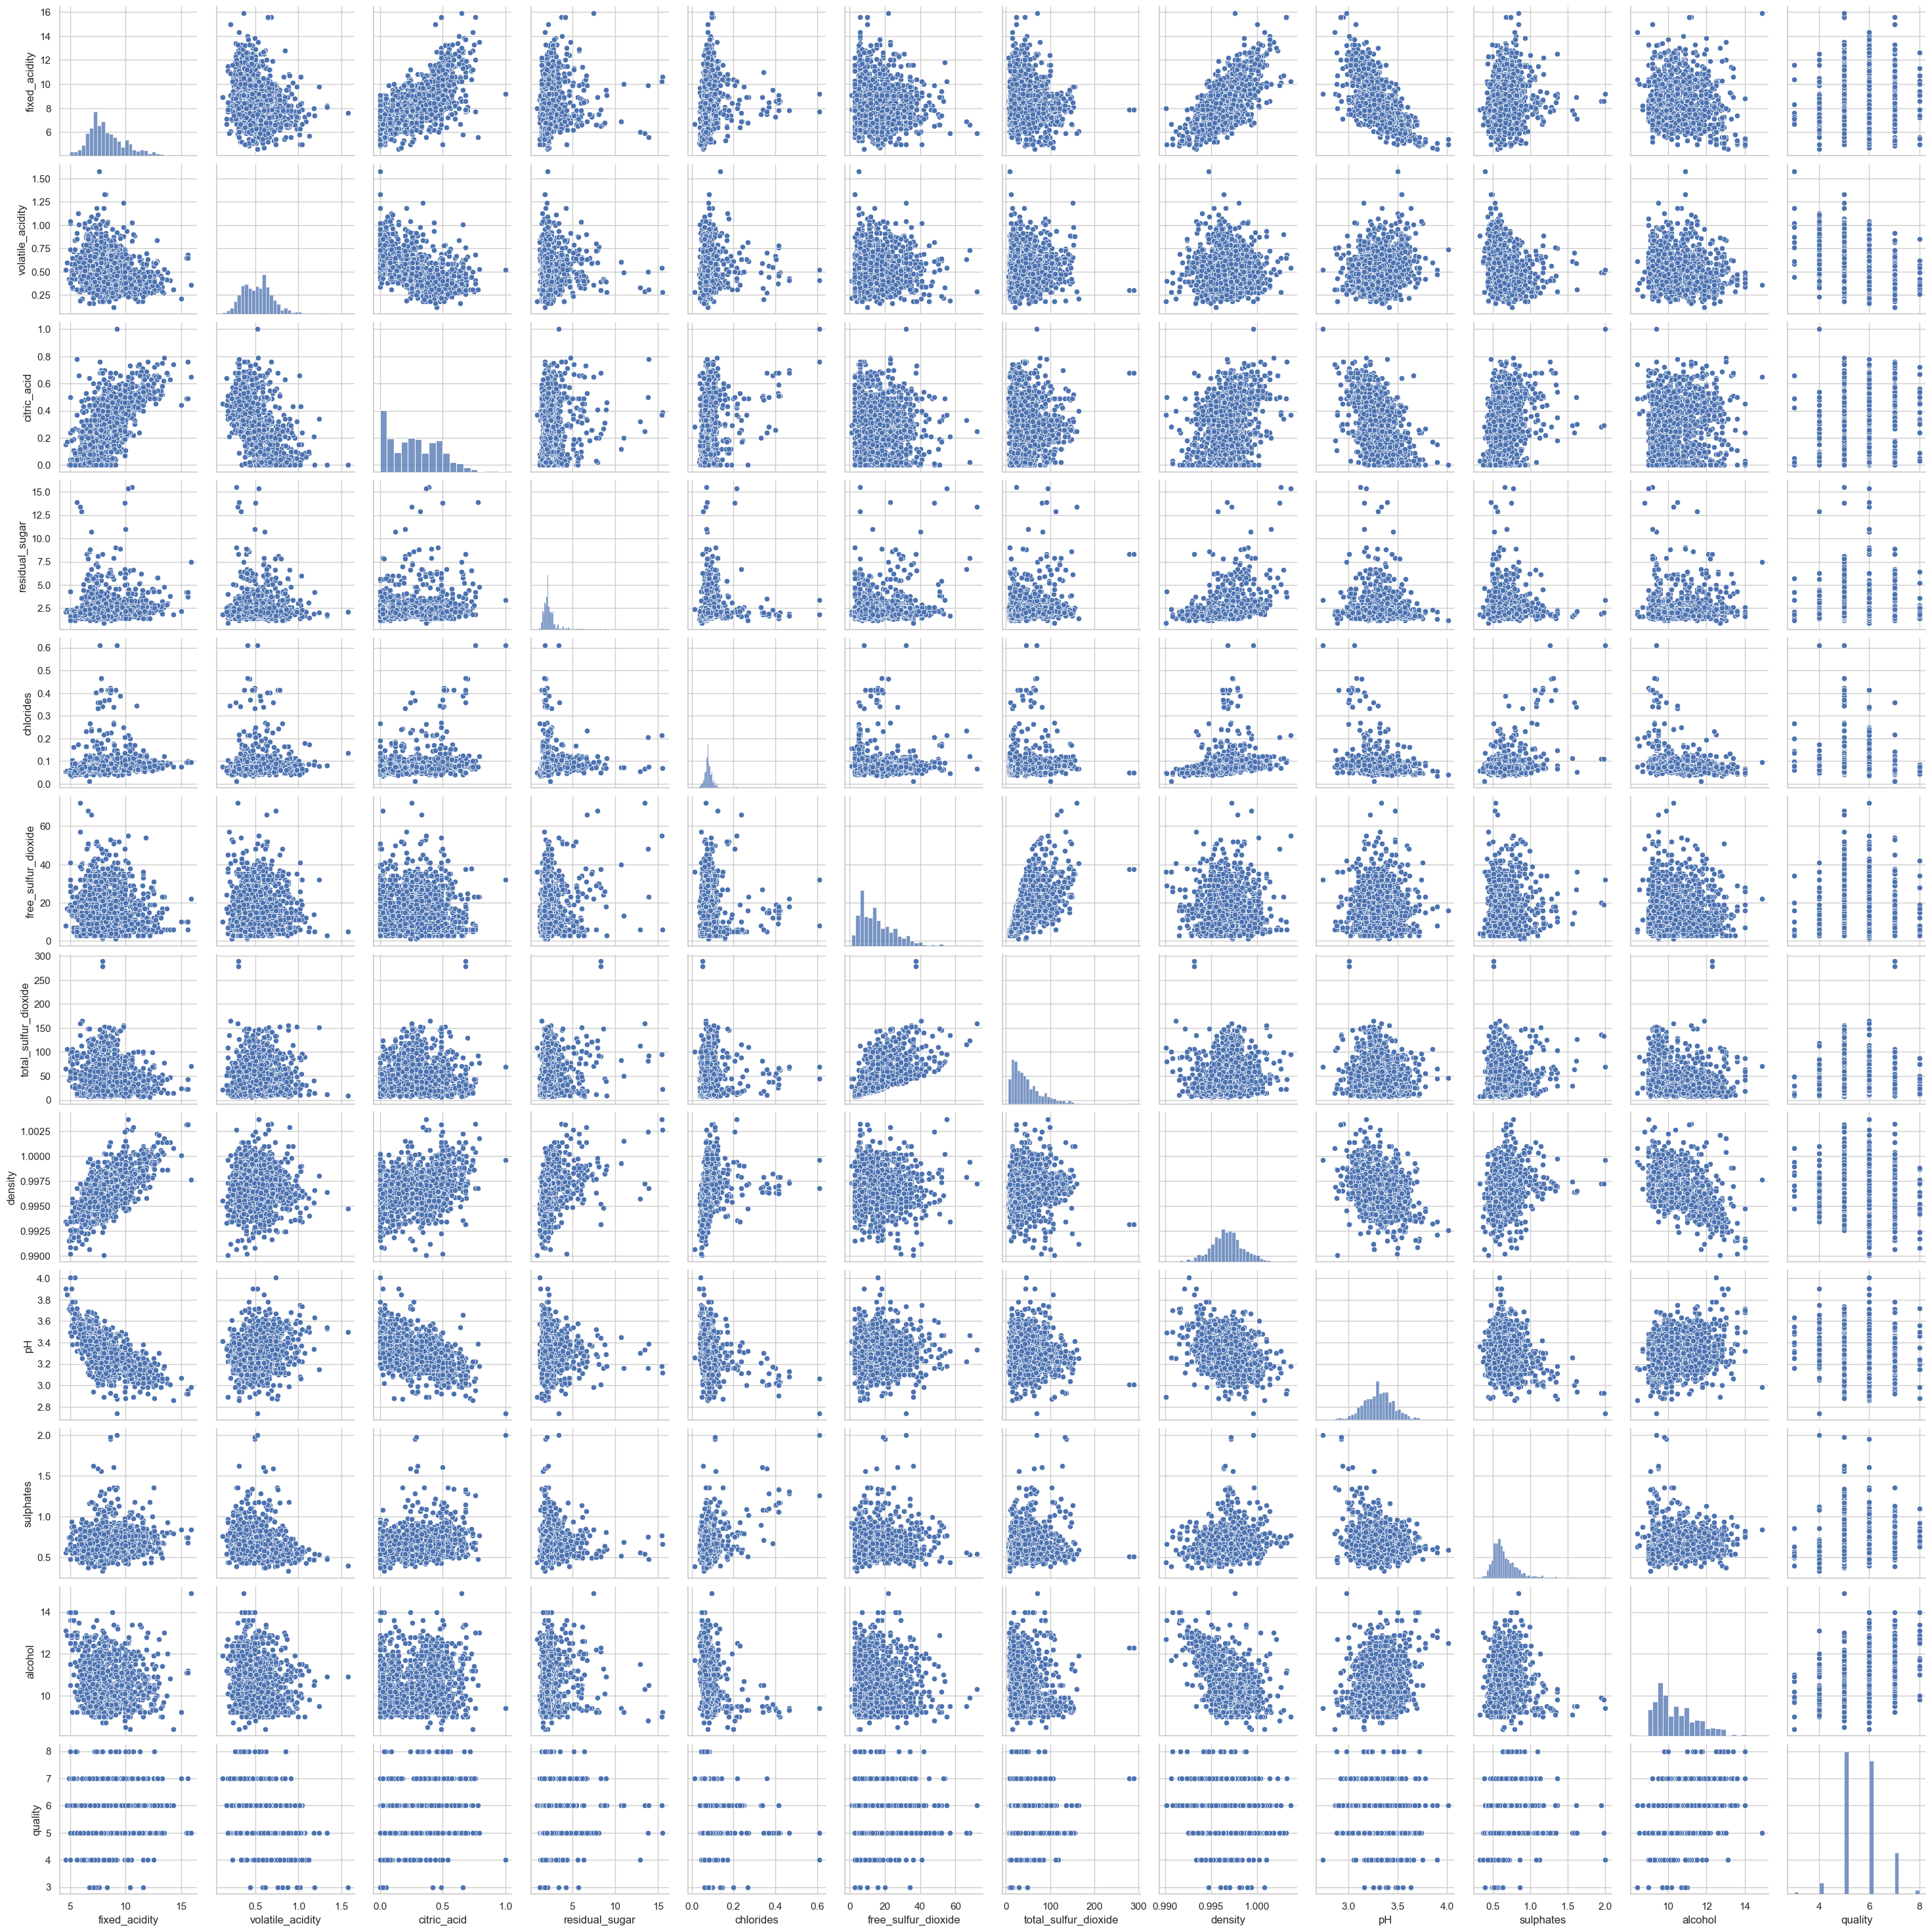

In [9]:
sns.set(style = "whitegrid")
sns.pairplot(wine)
plt.show()

### 상관관계 계수

- 수치적 관점의 상관관계를 보여주기 위해 확인
- 초기 단계에서 변수가 너무 많을 경우, 탈락시킬 변수들을 선택하기 위해 사용

In [10]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [11]:
eda_columns = ["volatile_acidity", "citric_acid", "sulphates", "alcohol", "quality"]

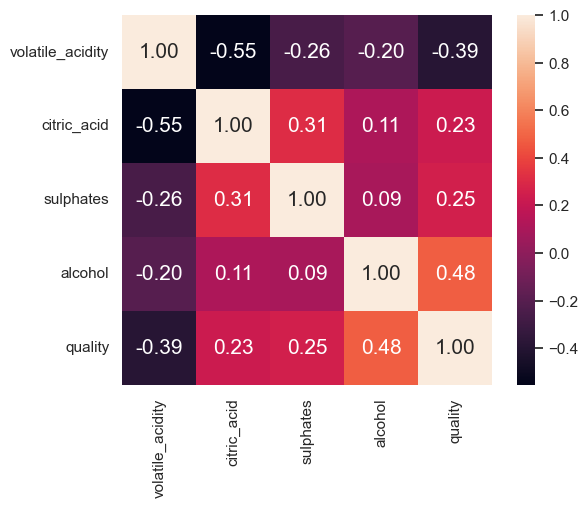

In [12]:
sns.set()
cor_hm = sns.heatmap(wine[eda_columns].corr(), cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size" : 15}, yticklabels = eda_columns, xticklabels = eda_columns)
plt.show()

### 변수 선택(후진 제거법, 전진 선택법)

- 후진 제거법(backward elimination)
    - 전체 변수를 대상으로 미리 정의한 모든 통계 수치(유의수준, 다중곤선성 등)를 만족할 때까지 반복저긍로 변수를 하나씩 제거
    - 이번 예제에서는 모델 목표 성능을 R제곱값 0.7이상으로 설정
    - 실무에서는 주로 후진 제거법을 사용
    
- 전진 선택법(forward selection)
    - 공집합에서 출발해서 전체 모델의 적합도가 좋아질때까지 변수를 증가

In [13]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [15]:
columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [16]:
pdx = wine[columns]
pdy = wine["quality"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size = 0.3, random_state = 2)

In [18]:
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new) # OLS : 선형회귀모델

In [19]:
# 모델 요약 출력
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     58.21
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          9.06e-102
Time:                        10:36:47   Log-Likelihood:                -1100.9
No. Observations:                1119   AIC:                             2226.
Df Residuals:                    1107   BIC:                             2286.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5291 

### VIF(Variance Inflation Factor)

- 다중 공선성 문제
    - 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제
- 다중 공선성을 없애는 가장 기본적인 방법
    - 다른 독립변수에 의존하는 변수를 없애는 것
- 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것으로, 가장 의존적인 독립변수를 선택할 때 사용

In [20]:
cnames = x_train.columns

In [21]:
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

fixed_acidity 7.691
volatile_acidity 1.758
citric_acid 3.149
residual_sugar 1.632
chlorides 1.515
free_sulfur_dioxide 1.886
total_sulfur_dioxide 2.165
density 6.2
pH 3.334
sulphates 1.428
alcohol 3.03


#### 이번 예제에서 살펴볼 척도

- AIC
    - 주어진 데이터셋에 대한 통계모델의 상대적인 품질 평가
    - 절대 수치는 중요하지 않고, 상대 수치가 적을수록 좋다(모형 적합도가 높다 또는 정보 손실이 적다)
- 수정 R 제곱
    - 0.7 이상이어야 한다
- 개별 변수의 P값
    - 유의확률. 표본 이상으로 극단적인 결과를 얻을 확률
    - 0.05 이하이어야 한다.
- 개별 변수의 VIF
    - 15 이하여야 한다.

# 변수 제거 1

- fixed_acidity 변수가 가장 높은 P값을 갖기 때문에 제거
    - 무의미한 변수가 다중공선성보다 더 심각한 문제를 유발하기 때문
    - 최종적으로는 P값이 높은 변수, VIF가 높은 변수 모두 제거되어야 함
- 제거된 변수 : fixed_acidity

In [23]:
columns.remove("fixed_acidity")

In [24]:
columns

['volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [25]:
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size=0.3, random_state=2)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     64.09
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.11e-102
Time:                        11:09:31   Log-Likelihood:                -1100.9
No. Observations:                1119   AIC:                             2224.
Df Residuals:                    1108   BIC:                             2279.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.9616 

In [26]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.757
citric_acid 2.787
residual_sugar 1.363
chlorides 1.411
free_sulfur_dioxide 1.871
total_sulfur_dioxide 2.045
density 2.448
pH 1.616
sulphates 1.391
alcohol 2.207


- AIC : 2226 => 2224 (개선됨)
- 수정 R제곱 : 0.36 => 0.361 (개선됨)
- 개별 변수 P값 : density가 가장 무의미
- 개별 변수 VIF : citric_acid가 가장 높지만 15 미만

# 변수 제거 2

- 제거된 변수 : fixed_acidity, density

In [27]:
columns.remove("density")

In [28]:
columns

['volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [29]:
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size=0.3, random_state=2)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     71.25
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.36e-103
Time:                        11:14:59   Log-Likelihood:                -1101.0
No. Observations:                1119   AIC:                             2222.
Df Residuals:                    1109   BIC:                             2272.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.3002 

In [30]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.633
citric_acid 2.197
residual_sugar 1.077
chlorides 1.371
free_sulfur_dioxide 1.869
total_sulfur_dioxide 1.981
pH 1.615
sulphates 1.326
alcohol 1.306


- AIC : 2224 => 2222 (개선됨)
- 수정 R제곱 : 0.361 => 0.361
- 개별 변수 P값 : residual_sugar가 가장 무의미
- 개별 변수 VIF : citric_acid가 가장 높지만 15 미만

# 변수 제거 3

- 제거된 변수 : fixed_acidity, density, residual_sugar

In [32]:
columns.remove("residual_sugar")

In [33]:
columns

['volatile_acidity',
 'citric_acid',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [34]:
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size=0.3, random_state=2)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     80.19
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          1.65e-104
Time:                        11:17:47   Log-Likelihood:                -1101.1
No. Observations:                1119   AIC:                             2220.
Df Residuals:                    1110   BIC:                             2265.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.2844 

In [35]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.622
citric_acid 2.172
chlorides 1.371
free_sulfur_dioxide 1.86
total_sulfur_dioxide 1.959
pH 1.611
sulphates 1.321
alcohol 1.297


- AIC : 2222 => 2220 (개선됨)
- 수정 R제곱 : 0.361 => 0.362 (개선됨)
- 개별 변수 P값 : citric_acid가 가장 무의미(0.05보다 큼)
- 개별 변수 VIF : citric_acid가 가장 높지만 15 미만

# 변수 제거 4

- 제거된 변수 : fixed_acidity, density, residual_sugar, citric_acid

In [36]:
columns.remove("citric_acid")

In [37]:
columns

['volatile_acidity',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [38]:
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size=0.3, random_state=2)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     91.62
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          2.07e-105
Time:                        11:21:10   Log-Likelihood:                -1101.3
No. Observations:                1119   AIC:                             2219.
Df Residuals:                    1111   BIC:                             2259.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.1056 

In [39]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.222
chlorides 1.315
free_sulfur_dioxide 1.823
total_sulfur_dioxide 1.912
pH 1.245
sulphates 1.316
alcohol 1.244


- AIC : 2220 => 2219 (개선됨)
- 수정 R제곱 : 0.362 => 0.362 (변화 없음)
- 개별 변수 P값 : free_sulfur_dioxide가 가장 무의미(0.05보다 큼)
- 개별 변수 VIF : total_sulfur_dioxide가 가장 높지만 15 미만

# 변수 제거 5

In [41]:
columns.remove("free_sulfur_dioxide")

In [42]:
columns

['volatile_acidity',
 'chlorides',
 'total_sulfur_dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [43]:
pdx = wine[columns]
pdy = wine["quality"]
x_train, x_test, y_train, y_test = train_test_split(pdx, pdy, test_size=0.3, random_state=2)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
full_mod = sm.OLS(y_train, x_train_new)
full_res = full_mod.fit()
print(full_res.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     106.3
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          6.61e-106
Time:                        11:23:44   Log-Likelihood:                -1102.6
No. Observations:                1119   AIC:                             2219.
Df Residuals:                    1112   BIC:                             2254.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.0037 

In [44]:
cnames = x_train.columns
for i in np.arange(len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1 - res.rsquared)
    print(yvar, round(vif, 3))

volatile_acidity 1.205
chlorides 1.314
total_sulfur_dioxide 1.077
pH 1.208
sulphates 1.316
alcohol 1.243


- AIC : 2219 => 2219 (변화 없음)
- 수정 R제곱 : 0.362 => 0.361 (성능 감소)
- 개별 변수 P값 : 무의미한 변수는 모두 제거함
- 개별 변수 VIF : 모든 변수가 15보다 작음

- 결론 : 독립 변수와 종속 변수 사이에 어떤 강한 관계도 존재하지 않는다

In [46]:
y_pred = full_res.predict(x_test_new)
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns = ["y_pred"]

pred_data = pd.DataFrame((y_pred_df["y_pred"]))
y_test_new = pd.DataFrame(y_test)
y_test_new.reset_index(inplace=True)
pred_data["y_test"] = pd.DataFrame(y_test_new["quality"])

In [49]:
r2_score(y_test_new["quality"].tolist(), y_pred_df["y_pred"].tolist())

0.32583051953905684